<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             14825 non-null  object 
 1   age                                14825 non-null  int64  
 2   id                                 14825 non-null  object 
 3   became_member_on (year month day)  14825 non-null  int64  
 4   income                             14825 non-null  float64
 5   ever_married                       14825 non-null  object 
 6   kids                               14825 non-null  int64  
 7   home_state                         14825 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 926.7+ KB


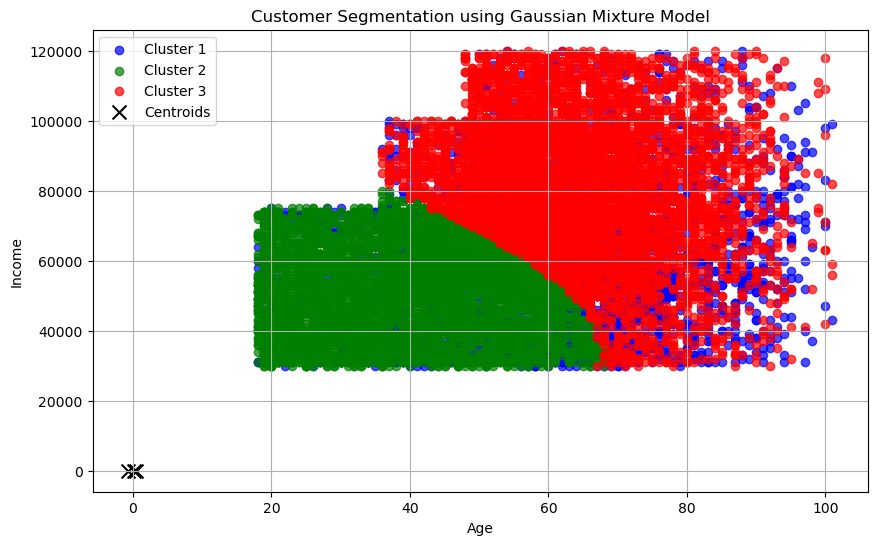

Characteristics of Cluster 1: 
Average Age: 58.65
Average Income: 61589.86
Average Number of Kids: 3.51


Characteristics of Cluster 2: 
Average Age: 39.47
Average Income: 50738.15
Average Number of Kids: 1.05


Characteristics of Cluster 3: 
Average Age: 64.26
Average Income: 80557.17
Average Number of Kids: 1.00




In [2]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Load and preprocess the data
data = pd.read_csv('customer_profiles.csv')
data.info()
# Selecting relevant columns for clustering
X = data[['age', 'income', 'kids']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Model Training
# Initialize and fit a Gaussian Mixture Model
n_components = 3  # Number of clusters
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_scaled)

# Predict the cluster labels
cluster_labels = gmm.predict(X_scaled)

# Step 3: Visualization
# Plot the clusters
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'orange', 'purple']  # Adjust as needed
for i in range(n_components):
    plt.scatter(X.iloc[cluster_labels == i, 0], X.iloc[cluster_labels == i, 1], 
                c=colors[i], label='Cluster ' + str(i+1), alpha=0.7)

# Plot centroids
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='black', marker='x', s=100, label='Centroids')

plt.title('Customer Segmentation using Gaussian Mixture Model')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.grid(True)
plt.show()
# Step 4: Describe each customer segment
for i in range(n_components):
    segment_data = X[cluster_labels == i]
    print("Characteristics of Cluster {}: ".format(i+1))
    print("Average Age: {:.2f}".format(segment_data['age'].mean()))
    print("Average Income: {:.2f}".format(segment_data['income'].mean()))
    print("Average Number of Kids: {:.2f}".format(segment_data['kids'].mean()))
    print("\n")

In [12]:
# Extract centroids of each cluster
centroids = scaler.inverse_transform(gmm.means_)

# Create a DataFrame to organize and label the centroids
centroid_df = pd.DataFrame(centroids, columns=X.columns)
centroid_df.index.name = 'Cluster'

# Print the characteristics of each cluster
print("Characteristics of Each Customer Segment:")
for i in range(n_components):
    print(f"\nCluster {i+1}:")
    print(centroid_df.loc[i])


Characteristics of Each Customer Segment:

Cluster 1:
age          57.460298
income    62421.161789
kids          3.232611
Name: 0, dtype: float64

Cluster 2:
age          41.464134
income    51809.860567
kids          1.067489
Name: 1, dtype: float64

Cluster 3:
age          63.376758
income    79664.551533
kids          1.043040
Name: 2, dtype: float64


In [14]:
import pandas as pd

# Load ad details from ad_details.csv
ad_details = pd.read_csv('ad_details.csv')
ad_details.head()


,reward,channels,required_amount,duration (days),offer_type,ad id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
